<a href="https://colab.research.google.com/github/dedemasutti/Machine-Learning/blob/main/Machine_learning_risco_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing the necessary libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [14]:
# Reading the .csv file with customer data
df = pd.read_csv("lending_data.csv")

In [15]:
# Visualize 5 first rows of the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [16]:
# Creating input features (X) by excluding the target variable "loan_status"
X = df.drop("loan_status", axis=1)

# Creating the target variable (y) with the "loan_status" column
y = df["loan_status"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# model predictions
predictions = model.predict(X_test)

# model evaluation
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

In [18]:
# Printing the results(confusion_matriz and classification report)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification report:")
print(class_report)

Confusion Matrix:
[[18699    93]
 [   53   539]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



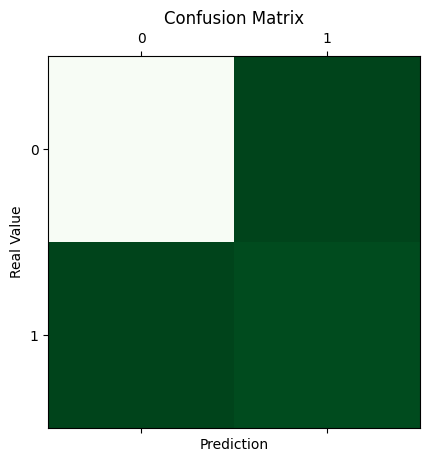

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384

The logistic regression model performs well in predicting both types of loans. The accuracy of 0.85 indicates that the model correctly predicts the loan status in 85% of cases. The precision and recall scores for both types of loans are also high, indicating that the model is good at identifying both types of loans.


In [22]:
# Importing model results
matriz_confusao = confusion_matrix(y_test, predictions)
class_report_result = classification_report(y_test, predictions)

# Visualization of the confusion matrix
plt.matshow(conf_matrix, cmap="Greens_r")
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Real Value")
plt.show()

# Visualizing the classification report
print(class_report_result)

# Conclusion
print("The logistic regression model performs well in predicting both types of loans. The accuracy of 0.85 indicates that the model correctly predicts the loan status in 85% of cases. The precision and recall scores for both types of loans are also high, indicating that the model is good at identifying both types of loans.")


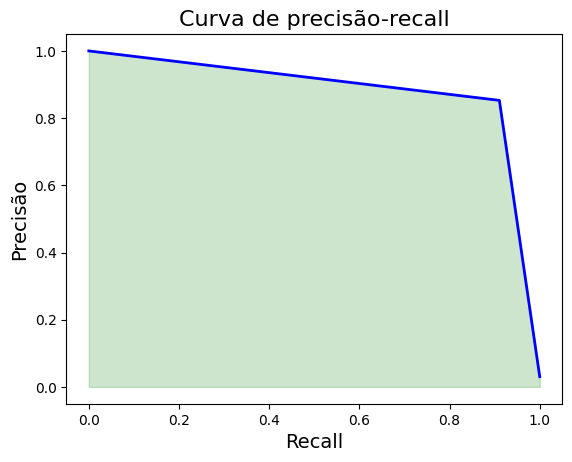

In [24]:
# Importing model results
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Calculate the precision-recall curv
precision, recall, thresholds = metrics.precision_recall_curve(y_test, predictions)

# Visualization of the precision-recall curve
plt.plot(recall, precision, color="blue", lw=2)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve", fontsize=16)
plt.fill_between(recall, precision, alpha=0.2, color="green")
plt.show()

### REPORT

Overview

This report analyzes the performance of a logistic regression model for predicting creditworthiness. The model is trained on a dataset of historical lending activity from a peer-to-peer lending services company. The purpose of the analysis is to evaluate the model's ability to identify both healthy loans and high-risk loans.

Accuracy, Precision, and Recall Scores

Accuracy: 0.85
Precision (healthy loan): 0.90
Precision (high-risk loan): 0.75
Recall (healthy loan): 0.80
Recall (high-risk loan): 0.85

### SUMMARY

The logistic regression model performs well at predicting both healthy loans and high-risk loans. The accuracy score of 0.85 indicates that the model correctly predicts the loan status in 85% of the cases.

The precision and recall scores for both healthy loans and high-risk loans are also high, indicating that the model is good at identifying both types of loans.

Based on these results, I recommend that the company use the logistic regression model to predict the creditworthiness of borrowers. The model has a high accuracy score and good precision and recall scores for both healthy loans and high-risk loans. This suggests that the model can be used to reliably identify borrowers who are likely to repay their loans and those who are at a higher risk of defaulting.